# Predicting heart disease using machine learning

This notebook uses Python-based machine learning and data science libraries in 
order to build a machine learning model that can predict whether or not someone
has heart disease based on their medical attributes. This project is part of a udemy course (https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/?referralCode=6CFE2C4C4F24793A1F88)

Steps taken:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

> Can we predict whether or not a patient has heart disease given specific medical attributes?

## 2. Data

Original data taken from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/heart+disease

Data dictionary taken from https://www.kaggle.com/ronitf/heart-disease-uci#

## 3. Evaluation

> Goal of 95% accuracy.

## 4. Features

*** Create data dictionary ***

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 1: typical angina - chest pain related to decreased blood supply to the heart
-- Value 2: atypical angina - chest pain not related to the heart
-- Value 3: non-anginal pain - typically esophageal spasms (non heart related)
-- Value 4: asymptomatic - chest pain not showing signs of disease
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: 1 or 0

## Preparing the tools

In [1]:
# Import tools

# Regular exploratory data analysis and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (EDA)

The goal is to explore the dataset and to discover more about the data

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get more about the data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# How many of each class of target there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

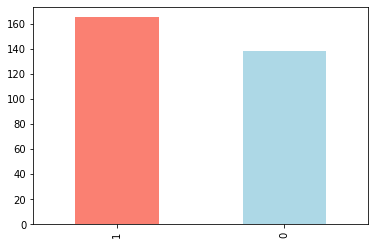

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

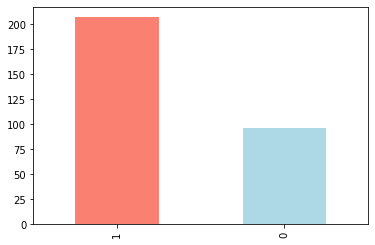

In [9]:
df.sex.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

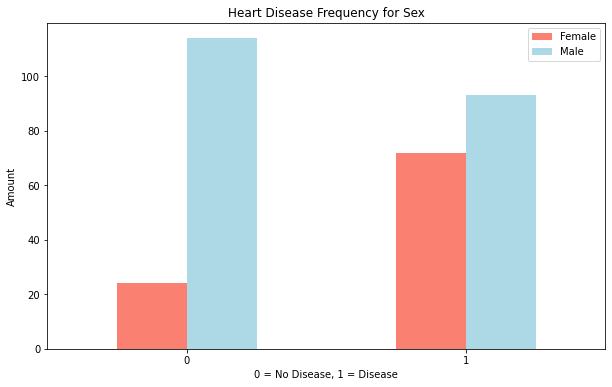

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for Heart Disease

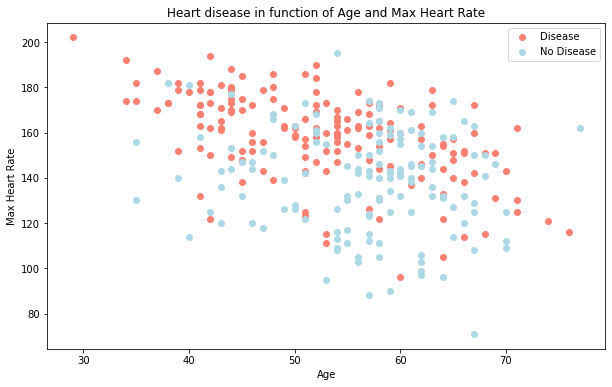

In [11]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

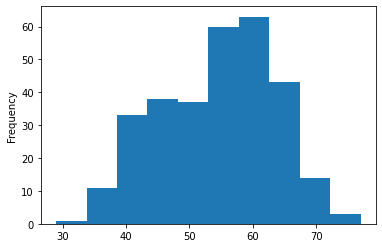

In [12]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
* cp: chest pain type
    * Value 1: typical angina - chest pain related to decreased blood supply to the heart
    - Value 2: atypical angina - chest pain not related to the heart
    - Value 3: non-anginal pain - typically esophageal spasms (non heart related)
    - Value 4: asymptomatic - chest pain not showing signs of disease

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

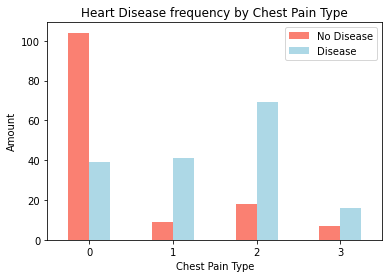

In [13]:
# Check chestpain type in relation to heart disease

pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   color=["salmon","lightblue"])

plt.title("Heart Disease frequency by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


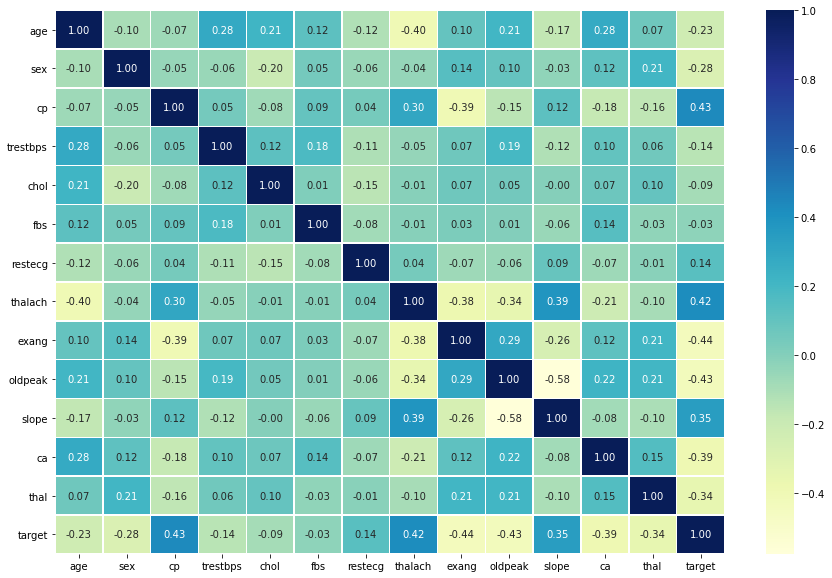

In [15]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modeling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]
X.shape, y.shape

((303, 13), (303,))

In [18]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


We are done splitting data into train and test set. 

We will now train the model on the training set

and test the model with the testing set.

We will try using 3 models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [19]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different SKlearn machine learning models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
# Scale data
from sklearn import preprocessing
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)
X_scaled_train.shape

(242, 13)

In [21]:
model_scores = fit_and_score(models, X_scaled_train, X_scaled_test, 
                             y_train, y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8524590163934426}

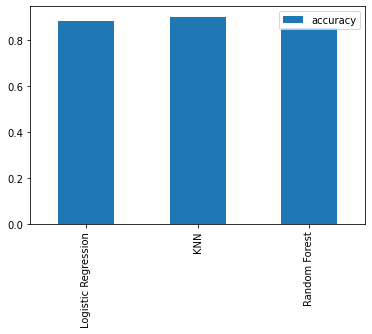

In [22]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Next Steps to test:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [23]:
# Tune KNN

train_scores = []
test_scores = []

# Create a list of different values of n_neighbours
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_scaled_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_scaled_train, y_train))
    
    # Update test scores list
    test_scores.append(knn.score(X_scaled_test, y_test))

Maximum KNN score on the test data: 90.16%


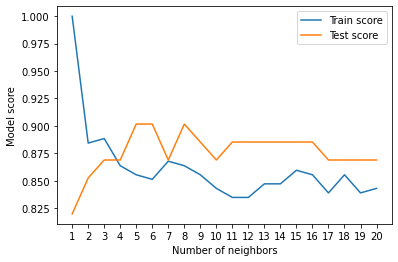

In [24]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning using RandomizedSearchCV

We will tune the ff using RandomizedSearchCV:
* LogisticRegression()
* RandomForestClassifier()
* KNeighborsClassifier()

In [25]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

# Create a hyperparameter grid for KNeighborsClassifer
kn_grid = {'metric': ['euclidean', 'manhattan'],
         'n_neighbors': np.arange(1,20,1),
          'weights': ['uniform', 'distance']}

In [26]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [28]:
rs_log_reg.best_score_

0.8221088435374149

In [29]:
rs_log_reg.score(X_scaled_test, y_test)

0.8852459016393442

LogisticRegression done, now tune RandomForestClassifier()

In [30]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True) 

# Fit hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
# Find the best score
rs_rf.best_score_

0.8305272108843538

In [33]:
rs_rf.score(X_scaled_test, y_test)

0.8688524590163934

Tuning KNClassifier()...

In [34]:
# Set random seed
np.random.seed(42)

# Setup random hyperparameter search for KNeighborsClassifier
rs_kn = RandomizedSearchCV(KNeighborsClassifier(),
                          param_distributions=kn_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit hyperparameter search model for KNeighborsClassifier
rs_kn.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [35]:
rs_kn.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}

In [36]:
rs_kn.best_score_

0.8385204081632652

In [37]:
rs_kn.score(X_scaled_test, y_test)

0.8852459016393442

## Hyperparameter Tuning with GridSearchCV
We will try to improve KNeighborsClassifier results using GridSearchCV.

In [60]:
# Create a hyperparameter grid for KNeighborsClassifer
kn_grid = {'metric': ['euclidean', 'manhattan'],
         'n_neighbors': np.arange(1,30,1),
          'weights': ['uniform', 'distance']}

# Setup grid hyperparameter search for KNeighborsClassifier
gs_kn = GridSearchCV(KNeighborsClassifier(),
                    param_grid=kn_grid,
                    cv=5,
                    verbose=True)

# Fit grid hyperparameter search model
gs_kn.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [61]:
# Check best hyperparameters
gs_kn.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

In [62]:
# Check best score
gs_kn.best_score_

0.8431122448979591

In [63]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8524590163934426}

In [64]:
gs_kn.score(X_scaled_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

note: use cross-validation where possible

To make comparisons and evaluate the trained model, first predictions should be made.

In [43]:
y_preds = gs_kn.predict(X_scaled_test)

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

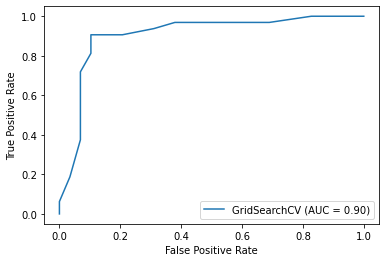

In [45]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_kn, X_scaled_test, y_test);

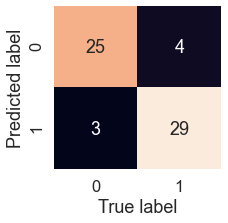

In [46]:
# Confusion matrix
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [47]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [50]:
# Classification report with cross-validation

# Create a new classifier with best parameters
clf = KNeighborsClassifier(**rs_kn.best_params_)

In [65]:
# Scale X since KNeighbors model uses scaled data
X_scaled = preprocessing.scale(X)

In [66]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X_scaled, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8118579234972678

In [67]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              X_scaled,
                              y,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.804722224043107

In [68]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                              X_scaled,
                              y,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8666666666666666

In [69]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                              X_scaled,
                              y,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.833450408332347

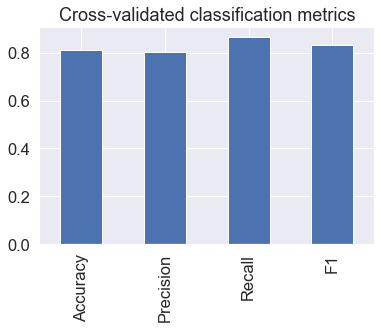

In [70]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

# Feature Importance
> Which features contributed the most to the outcome of the model and how did they contribute?

age 0.03432343234323432
sex 0.0561056105610561
cp 0.0528052805280528
trestbps 0.03564356435643564
chol 0.03498349834983498
fbs 0.021122112211221122
restecg 0.036963696369636964
thalach 0.03498349834983498
exang 0.0528052805280528
oldpeak 0.034323432343234324
slope 0.033003300330033
ca 0.06072607260726073
thal 0.06270627062706272


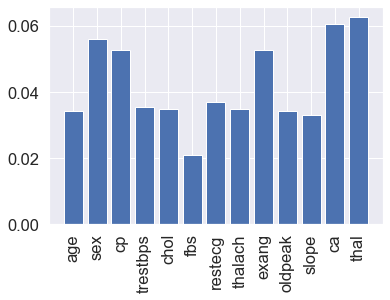

In [106]:
from sklearn.inspection import permutation_importance
# Fit classifier
clf.fit(X_scaled, y)
# perform permutation importance
results = permutation_importance(clf, X_scaled, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
headers = X.columns.values
# Create features dictionary
features = dict(tuple(zip(headers, importance)))
# summarize feature importance
for k in features.keys():
    print(k, features.get(k))
# plot feature importance
plt.bar(x=headers, height=importance)
plt.xticks(rotation=90)
plt.show()